In [45]:
# extra libraries for gis plotting
import geoviews as gv
import hvplot.pandas
import hvplot.xarray
import geopandas as gpd

# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
code_violations_query = ''' select * from [City_of_Scottsdale].[dbo].[np_CodeViolations] '''

code_violations = pd.read_sql(code_violations_query, connection)
connection.close()

# convert latitude and longitude attributes to numeric from object
# can I combine both of the below lines of code into one?
code_violations['_Latitude_'] = pd.to_numeric(code_violations['_Latitude_'], errors="coerce")
code_violations['_Longitude_'] = pd.to_numeric(code_violations['_Longitude_'], errors="coerce")

# set 'ViolationCategory' as index
code_violations.set_index('_ViolationCategory_', inplace=True)

code_violations.head()

,_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_,_Latitude_,_Longitude_
_ViolationCategory_,,,,,,,,,,,,,,,,,,
Zoning-Administration and Procedures,345175,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,1.1101,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec. 6.1000 (F-O) FOOTHILLS OVERLAY ZONE,345176,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,6.1060.A.1,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
Zoning-Native Plant Program,345177,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,7.501.1.b,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
Zoning-Uses Permitted Residential,355908,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,3.100,8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722
Zoning-Uses Permitted Residential,356293,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,5.012(A)(R1-190),8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722


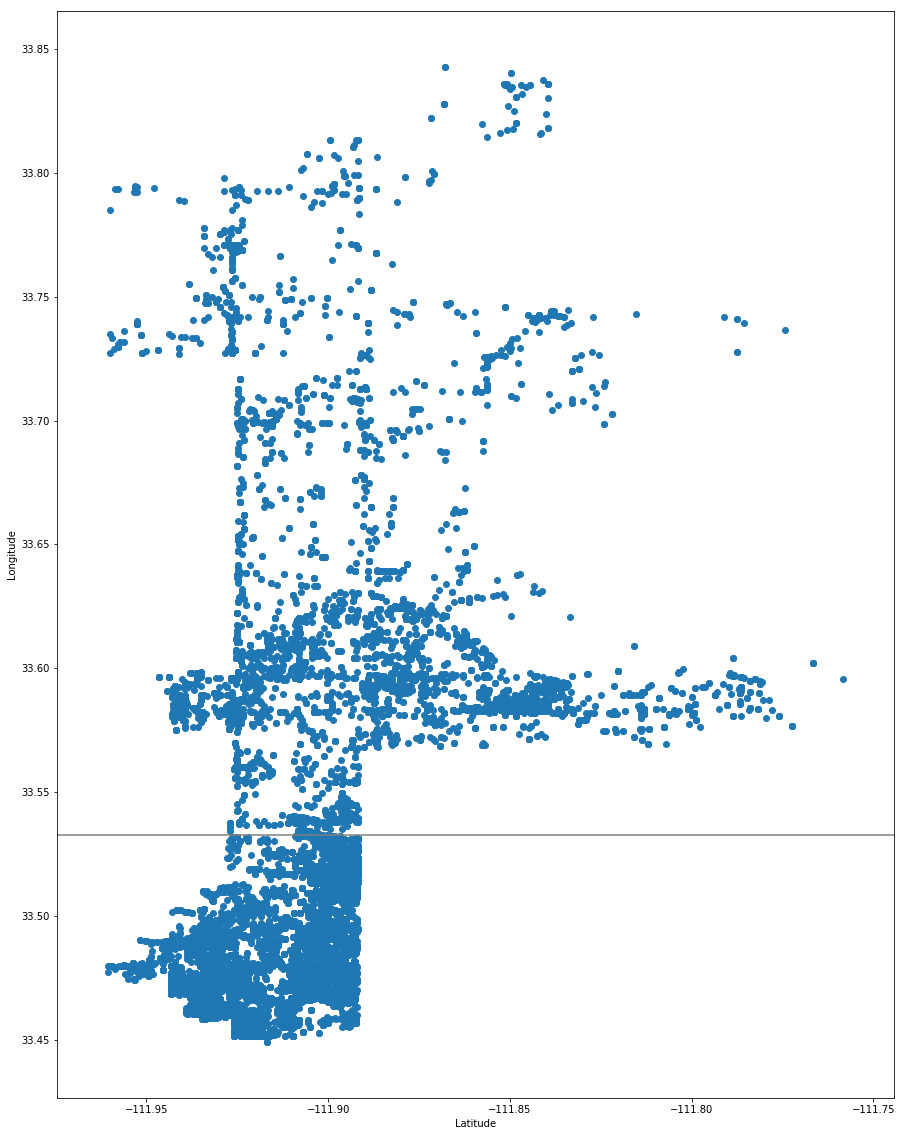

In [43]:
plt.rcParams["figure.figsize"] = [15, 20]

plt.scatter(x=code_violations['_Longitude_'], y=code_violations['_Latitude_'])
plt.ylabel("Longitude")
plt.xlabel("Latitude")

#show latitude position of mean violations
plt.axhline(code_violations['_Latitude_'].mean(), color='grey', label='mean violation')


In [4]:
gv.tile_sources.ESRI * code_violations.hvplot.points(
    '_Longitude_', '_Latitude_', geo=True, height=650)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [_Longitude_,_Latitude_]

In [69]:
# need to download selenium to be able to export map images

points = gv.Points(code_violations, ['_Longitude_', '_Latitude_'])
(gv.tile_sources.Wikipedia * points).opts(width=650, height=650, tools=['hover'])
# gv.save(filename="visualizations/Cases Map.png", xxx)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [_Longitude_,_Latitude_]   (_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_)

### Clustering analysis - which violation categories have a mean location furthest from the city center?  Since Scottsdale is aligned more strongly in a north/south way, my sense is that latitude will have the highest variability.

In [17]:
code_violations.head()

,_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCategory_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_,_Latitude_,_Longitude_
0,345175,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Administration and Procedures,1.1101,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
1,345176,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec...,6.1060.A.1,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
2,345177,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,Zoning-Native Plant Program,7.501.1.b,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
3,355908,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,Zoning-Uses Permitted Residential,3.100,8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722
4,356293,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,Zoning-Uses Permitted Residential,5.012(A)(R1-190),8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722


In [20]:
# mean latitude
code_violations['_Latitude_'].mean()

33.53273419207139

In [21]:
# mean longitude
code_violations['_Longitude_'].mean()

-111.90376419408769

In [76]:
# limit to groups with at least 100 violations over the course of the year
# so many violations at either end of the spectrum(north/south) have only a handful of occurences

grouped_over_onehundred = code_violations.groupby('_ViolationCategory_') \
    .filter(lambda x: x['_Latitude_'].count() >= 100)

grouped_over_onehundred.head()

,_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_,_Latitude_,_Longitude_
_ViolationCategory_,,,,,,,,,,,,,,,,,,
Zoning-Administration and Procedures,345175,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,1.1101,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec. 6.1000 (F-O) FOOTHILLS OVERLAY ZONE,345176,238737,2014-01-21 09:46:48.483000000,2018-07-20 08:28:22.257000000,CLOSED-NOV ISSUED,6.1060.A.1,9514,E,MARIPOSA GRANDE,DR,,,85255,217-05-006B,,,33.704477,-111.875734
Zoning-Uses Permitted Residential,355908,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,3.100,8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722
Zoning-Uses Permitted Residential,356293,247116,2014-08-11 09:54:15.710000000,2019-04-09 15:38:13.367000000,CLOSED-NOV ISSUED,5.012(A)(R1-190),8144,E,VIA DONA,RD,,,85266,216-70-005T,,,33.749464,-111.904722
18-9 LAND,391371,275416,2016-07-26 12:14:15.183000000,2018-05-24 09:33:39.900000000,CLOSED-NOV ISSUED,18-9(A)(1) Blight - Bare Lawn,3295,N,DRINKWATER,BL,,,85251,130-21-001F,,,33.485243,-111.922249


In [22]:
code_violations.groupby('_ViolationCategory_')['_Latitude_' , '_Longitude_'] \
    .agg(['mean','count']) \
    .sort_values(by=('_Longitude_', 'count'), ascending=False).head()

_Latitude_        _Longitude_       
                                        mean  count        mean  count
_ViolationCategory_                                                   
18-9 LAND                          33.524763  11277 -111.904585  11277
18-5 PUBLIC NUISANCE               33.543271   2817 -111.901673   2817
18-7 VEHICLES/ WATERCRAFT          33.518350    441 -111.908744    441
Zoning-Sign Requirements           33.571403    337 -111.904026    337
Zoning-Uses Permitted Residential  33.561110    196 -111.905558    196

In [26]:
# group by Violation Category and find mean latitude for each 
grouped_violations = code_violations.groupby('_ViolationCategory_')['_Latitude_'].mean().to_frame()
grouped_violations.head()

,_Latitude_
_ViolationCategory_,
17 - ON STREET VEHICLE PARKING,33.501472
17- ON STREET VEHICLE PARKING,33.491829
18-110 UNIFORM HOUSING CODE SECTION 1001.10 FAULTY MATERIALS OF CONSTRUCTION,33.508864
18-110 UNIFORM HOUSING CODE SECTION 1001.11 HAZARDOUS OR INSANITARY PREMISES,33.536614
18-110 UNIFORM HOUSING CODE SECTION 1001.12 INADEQUATE EXITS,33.593198


In [27]:
# add avg latitude column
grouped_violations['Avg_Latitude'] = code_violations['_Latitude_'].mean()
grouped_violations.head()

,_Latitude_,Avg_Latitude
_ViolationCategory_,,
17 - ON STREET VEHICLE PARKING,33.501472,33.532734
17- ON STREET VEHICLE PARKING,33.491829,33.532734
18-110 UNIFORM HOUSING CODE SECTION 1001.10 FAULTY MATERIALS OF CONSTRUCTION,33.508864,33.532734
18-110 UNIFORM HOUSING CODE SECTION 1001.11 HAZARDOUS OR INSANITARY PREMISES,33.536614,33.532734
18-110 UNIFORM HOUSING CODE SECTION 1001.12 INADEQUATE EXITS,33.593198,33.532734


In [50]:
# find dif between each violation category average longitude and average of all violation categories
# locations north of average latitude will be positive, while those south of average latitude will be negative

grouped_violations['Lat_Dif'] = grouped_violations['_Latitude_'] - grouped_violations['Avg_Latitude']
grouped_violations.sort_values('Lat_Dif', ascending=False).head(10)

,_Latitude_,Avg_Latitude,Lat_Dif
_ViolationCategory_,,,
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec. 6.1070 ESL DESIGN STANDARDS,33.766637,33.532734,0.233903
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec. 6.1000,33.747093,33.532734,0.214359
47-STREETS-SIDEWALKS-PUBLIC WORKS,33.746686,33.532734,0.213952
Zoning-Article VI SUPPLEMENTARY DISTRICTS: Sec. 6.1000 (F-O) FOOTHILLS OVERLAY ZONE,33.716011,33.532734,0.183276
Zoning-Article IX Parking and Loading Requirements: Sec. 9.105 Mobility impaired accessible spaces,33.702589,33.532734,0.169855
OPEN SPACE (O-S) ZONE,33.701202,33.532734,0.168468
Zoning-Native Plant Program,33.694395,33.532734,0.161661
18-6 LITTER CONTROL,33.675209,33.532734,0.142475
OTHER,33.658335,33.532734,0.125601


### Example Violcation Category

#### 'OPEN SPACE (O-S) ZONE' - Sec. 6.901. - Purpose. This district is intended to provide for land uses in areas generally subject to periodic inundation. It is further intended to provide for land uses in areas which have been set aside to serve recreational functions or to provide open space areas.

In [54]:
code_violations.loc['OPEN SPACE (O-S) ZONE'].head()

,_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_,_Latitude_,_Longitude_
_ViolationCategory_,,,,,,,,,,,,,,,,,,
OPEN SPACE (O-S) ZONE,414062,293539,2017-12-11 09:57:48.380000000,2018-06-07 14:10:14.150000000,CLOSED-CITATION-PARKING,6.902,8041,E,JUAN TABO,RD,,,85255,212-03-291,PINNACLE PEAK ESTATES UNIT THREE PHASE ONE & TWO,162,33.709197,-111.906241
OPEN SPACE (O-S) ZONE,417089,296081,2018-03-19 09:04:41.903000000,2018-06-06 11:38:34.123000000,CLOSED-NOV ISSUED,6.902,31661,N,71ST,ST,,,85266,216-50-183,,,33.773288,-111.927535
OPEN SPACE (O-S) ZONE,417821,296662,2018-04-05 16:42:15.660000000,2018-05-17 15:47:50.060000000,CLOSED-INITIAL,6.903.B.1,7920,E,OSBORN,RD,,,85251,130-27-002V,,,33.490567,-111.911956
OPEN SPACE (O-S) ZONE,420588,298782,2018-06-06 13:30:33.670000000,2018-06-06 16:06:12.013000000,CLOSED-INITIAL,6.902,11106,E,CHOLLA,CR,,,85262,219-11-250,CAREFREE HILLS,36,33.837485,-111.840897
OPEN SPACE (O-S) ZONE,421589,299555,2018-06-25 09:46:35.310000000,2018-07-02 09:12:47.567000000,CLOSED-INITIAL,6.902,18720,N,101ST,ST,,,85255,217-57-657,STERLING AT SILVERLEAF,,33.656549,-111.864915


In [52]:
points = gv.Points(code_violations.loc['OPEN SPACE (O-S) ZONE'], ['_Longitude_', '_Latitude_'])
(gv.tile_sources.Wikipedia * points).opts(width=650, height=650, tools=['hover'])

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [_Longitude_,_Latitude_]   (_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_)

### Which violations cluster most to the south?

In [72]:
grouped_violations.sort_values('Lat_Dif', ascending=True).tail(20)

,_Latitude_,Avg_Latitude,Lat_Dif
_ViolationCategory_,,,
18-110 UNIFORM HOUSING CODE SECTION 1001.5 HAZARDOUS ELECTRICAL WIRING,33.603656,33.532734,0.070922
Zoning-Article X Landscaping Requirements Sec. 10.700 Required Landscape Maintenance,33.604335,33.532734,0.071601
Zoning-Article V District Regulations: Sec. 5.200 R1-35 Single-Family Residential District,33.617747,33.532734,0.085012
Zoning-Article V District Regulations: Sec. 5.030 R1-70 Single-Family Residential District,33.617869,33.532734,0.085135
Zoning-Article VII General Provisions: Sec. 7.203,33.619547,33.532734,0.086813
Zoning-Article IX Parking and Loading Requirements 9.102 Applications of and Exemptions from Parking,33.620346,33.532734,0.087612
Zoning-Lighting Standards,33.621666,33.532734,0.088932
Zoning-Article V District Regulations: Sec. 5.100 R1-43 Single-Family Residential District,33.621933,33.532734,0.089199
Zoning-Uses Permitted Industrial,33.624324,33.532734,0.091590


In [70]:
points = gv.Points(code_violations.loc['18-8 BUILDINGS/ STRUCTURES/ ACCESSORY IMPROVEMENTS'], ['_Longitude_', '_Latitude_'])
(gv.tile_sources.Wikipedia * points).opts(width=650, height=650, tools=['hover'])

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [_Longitude_,_Latitude_]   (_ViolationID_,_ComplaintID_,_DateComplaintReceived_,_DateComplaintClosed_,_ComplaintStatus_,_ViolationCode_,_StreetNumber_,_StreetDirection_,_StreetName_,_StreetType_,_SuiteApt_,_UnitNumber_,_ZipCode_,_ParcelCode_,_Subdivision_,_LotNumber_)